<a href="https://colab.research.google.com/github/albertorekena/education-improvement/blob/master/smotetomek_07_portuguese_modelling_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer,mean_squared_error
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

In [399]:
df_por = pd.read_pickle('df_por-modelling-range_G3_5-repaired_G3_0_values.pkl')

df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,2,3,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,1,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,3,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,1,15,1,0,1,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,1,3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,1,1,15,1,1,1,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,2,4,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,1,1,16,1,1,1,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,2,4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [400]:
df_por.shape

(649, 44)

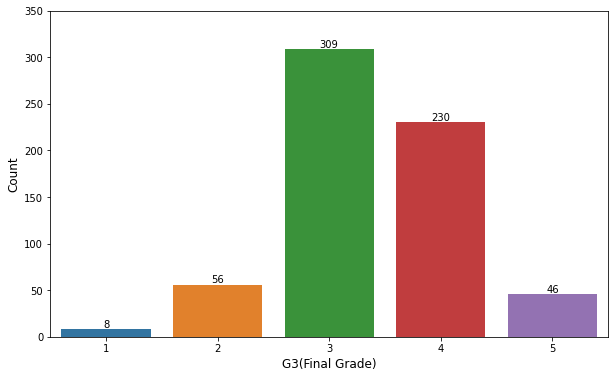

In [401]:
plt.figure(figsize = (10,6))
ax = sns.countplot(df_por['G3'])
plt.ylim(0,350)
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 2,p.get_height(),ha = 'center')

## Oversampling 

In [0]:
X = np.array(df_por.drop('G3',axis = 1))
y = np.array(df_por['G3'])

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [404]:
X_train.shape

(519, 43)

In [0]:
#sm = SMOTETomek()
sm = SMOTE()


In [0]:
X_train,y_train = sm.fit_resample(X_train,y_train)

In [383]:
X_train.shape

(1225, 43)

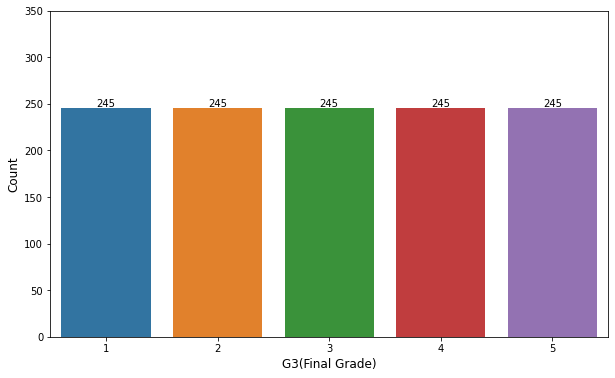

In [384]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y_train)
plt.ylim(0,350)
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 2,p.get_height(),ha = 'center')

## Logistic Regression

In [0]:
model = LogisticRegression()

In [263]:
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracy: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.57959184 0.78367347 0.77959184 0.75918367 0.71020408]
Mean Accuracy: 0.72
Standard Deviation: 0.08


In [0]:
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [265]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.10      0.12      0.11         8
           3       0.62      0.48      0.54        64
           4       0.46      0.66      0.54        44
           5       0.29      0.15      0.20        13

    accuracy                           0.48       130
   macro avg       0.29      0.28      0.28       130
weighted avg       0.50      0.48      0.48       130



In [266]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,4,5
1,4,3
2,4,5
3,5,3
4,3,3


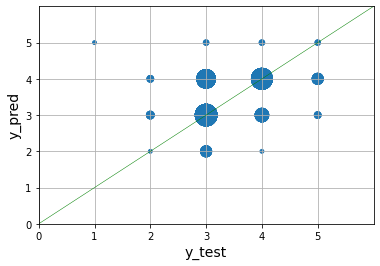

In [267]:
c = Counter(zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist()))
s = [15 * c[(x,y)] for x,y in zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist())]

plt.scatter(df_temp['y_test'],df_temp['y_pred'],s = s)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [0]:
def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [269]:
rmse(y_pred,y_test)

0.9156754547663373

## SVM

In [0]:
model = SVC()

In [271]:
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracy: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.6244898  0.67755102 0.71428571 0.73061224 0.62857143]
Mean Accuracy: 0.68
Standard Deviation: 0.04


In [0]:
parameters = [{'C':[1,10,100],'kernel':['linear']},
              {'C':[1,10,100],'kernel':['rbf'],'gamma':[0.5,0.1,0.001]}]

grid_search = GridSearchCV(estimator = model,param_grid = parameters,scoring = 'accuracy',cv = 5)
grid_search = grid_search.fit(X_train,y_train)

In [273]:
grid_search.best_score_
grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [274]:
model = SVC(C = 10,kernel = 'rbf',gamma = 0.1)
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracie: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.77959184 0.86938776 0.85714286 0.87346939 0.88979592]
Mean Accuracie: 0.85
Standard Deviation: 0.04


In [0]:
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [276]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.33      0.12      0.18         8
           3       0.61      0.69      0.65        64
           4       0.47      0.57      0.52        44
           5       0.50      0.08      0.13        13

    accuracy                           0.55       130
   macro avg       0.38      0.29      0.30       130
weighted avg       0.53      0.55      0.52       130



In [277]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,4,5
1,4,3
2,4,5
3,3,3
4,3,3


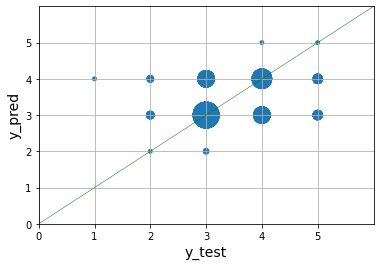

In [278]:
c = Counter(zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist()))
s = [15 * c[(x,y)] for x,y in zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist())]

plt.scatter(df_temp['y_test'],df_temp['y_pred'],s = s)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [279]:
rmse(y_pred,y_test)

0.8503392987960294

## KNN

In [0]:
model = KNeighborsClassifier()

In [281]:
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracy: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.73061224 0.76734694 0.73469388 0.74285714 0.73877551]
Mean Accuracy: 0.74
Standard Deviation: 0.01


In [0]:
parameters = {'n_neighbors':[2,5,10,20],'p':[1,3,5]}

grid_search = GridSearchCV(estimator = model,param_grid = parameters,scoring = 'accuracy',cv = 5)
grid_search = grid_search.fit(X_train,y_train)

In [283]:
grid_search.best_score_
grid_search.best_params_

{'n_neighbors': 2, 'p': 1}

In [284]:
model = KNeighborsClassifier(n_neighbors = 2,p = 1)
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracie: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.77142857 0.77142857 0.80408163 0.74693878 0.84897959]
Mean Accuracie: 0.79
Standard Deviation: 0.04


In [0]:
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [286]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.12      0.38      0.19         8
           3       0.64      0.47      0.54        64
           4       0.50      0.41      0.45        44
           5       0.37      0.54      0.44        13

    accuracy                           0.45       130
   macro avg       0.33      0.36      0.32       130
weighted avg       0.53      0.45      0.47       130



In [287]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3,5
1,3,3
2,3,5
3,5,3
4,4,3


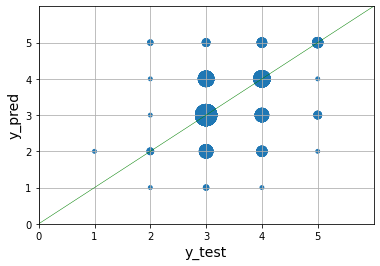

In [288]:
c = Counter(zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist()))
s = [15 * c[(x,y)] for x,y in zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist())]

plt.scatter(df_temp['y_test'],df_temp['y_pred'],s = s)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [289]:
rmse(y_pred,y_test)

1.1024448355290233

## Decision Tree Classifier

In [0]:
model = DecisionTreeClassifier()

In [291]:
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracy: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.66530612 0.77142857 0.7877551  0.75102041 0.75918367]
Mean Accuracy: 0.75
Standard Deviation: 0.04


In [0]:
parameters = {'max_depth':[5,15,30],'min_samples_split':[2,10,100],'min_samples_leaf':[1, 5, 10],'max_features':[2,5,11]}

grid_search = GridSearchCV(estimator = model,param_grid = parameters,scoring = 'accuracy',cv = 5)
grid_search = grid_search.fit(X_train,y_train)

In [293]:
grid_search.best_score_
grid_search.best_params_

{'max_depth': 15,
 'max_features': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [294]:
model = DecisionTreeClassifier(max_depth = 30,min_samples_split = 2,min_samples_leaf = 1)
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracie: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.65306122 0.73877551 0.75102041 0.76734694 0.76326531]
Mean Accuracie: 0.73
Standard Deviation: 0.04


In [0]:
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [296]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.28      0.62      0.38         8
           3       0.46      0.33      0.38        64
           4       0.42      0.45      0.43        44
           5       0.12      0.15      0.14        13

    accuracy                           0.37       130
   macro avg       0.26      0.31      0.27       130
weighted avg       0.40      0.37      0.37       130



In [297]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,4,5
1,4,3
2,3,5
3,4,3
4,5,3


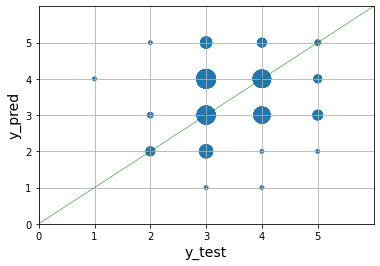

In [298]:
c = Counter(zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist()))
s = [15 * c[(x,y)] for x,y in zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist())]

plt.scatter(df_temp['y_test'],df_temp['y_pred'],s = s)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [299]:
rmse(y_pred,y_test)

1.116312611302876

## Random Forest Classifier

In [0]:
model = RandomForestClassifier()

In [406]:
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracie: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.58653846 0.55769231 0.61538462 0.53846154 0.51456311]
Mean Accuracie: 0.56
Standard Deviation: 0.04


In [0]:
# parameters = {'n_estimators':[100,500,1000],'max_depth':[5,15,30],'min_samples_split':[2,10,100],'min_samples_leaf':[1,5,10]}
parameters = {'n_estimators':[1000],'max_depth':[30],'min_samples_split':[2],'min_samples_leaf':[1]}

grid_search = GridSearchCV(estimator = model,param_grid = parameters,scoring = 'accuracy',cv = 5)
grid_search = grid_search.fit(X_train,y_train)

In [408]:
grid_search.best_score_
grid_search.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [409]:
model = RandomForestClassifier(n_estimators = 1000,max_depth = 30,min_samples_split = 2,min_samples_leaf = 1)
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracie: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.57692308 0.52884615 0.61538462 0.55769231 0.53398058]
Mean Accuracie: 0.56
Standard Deviation: 0.03


In [0]:
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [349]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         8
           3       0.58      0.72      0.64        64
           4       0.45      0.52      0.48        44
           5       0.00      0.00      0.00        13

    accuracy                           0.53       130
   macro avg       0.21      0.25      0.23       130
weighted avg       0.44      0.53      0.48       130



In [411]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,4,5
1,3,3
2,4,5
3,3,3
4,3,3


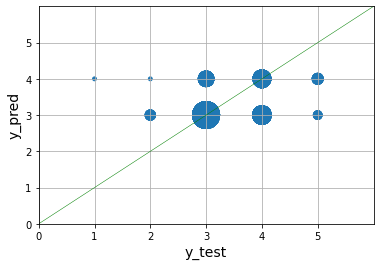

In [412]:
c = Counter(zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist()))
s = [15 * c[(x,y)] for x,y in zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist())]

plt.scatter(df_temp['y_test'],df_temp['y_pred'],s = s)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [413]:
rmse(y_pred,y_test)

0.818065259762795

In [414]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5307692307692308
Mean Squared Error: 0.6692307692307692
Root Mean Squared Error: 0.818065259762795


## Isolation forest

In [0]:
# Isolation Forest ----

# training the model
iso_forest = IsolationForest(n_estimators=300, contamination=0.10)
iso_forest = iso_forest .fit(df_por)

# predictions
isof_outliers = iso_forest.predict(df_por)

In [416]:
isoF_outliers_values = df_por[iso_forest.predict(df_por) == -1]
isoF_outliers_values

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
21,1,0,15,1,1,1,4,4,1,1,0,0,1,1,0,1,1,1,0,5,4,2,1,1,5,2,3,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
49,1,1,15,1,1,1,4,4,1,2,0,1,1,0,1,0,1,1,0,4,4,4,1,1,3,2,3,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0
52,1,0,15,1,0,0,4,2,2,1,0,0,0,0,0,1,1,0,0,5,5,5,3,4,5,2,3,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
61,1,1,16,1,1,1,1,1,4,1,0,1,1,0,1,0,1,1,1,5,5,5,5,5,5,2,4,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
66,1,0,15,1,1,0,4,4,1,4,0,0,1,0,1,0,1,1,1,1,3,3,5,5,3,2,3,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
89,1,0,16,1,0,0,4,4,1,2,0,0,1,0,0,1,1,0,0,4,1,3,3,5,5,1,3,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
100,1,0,16,1,1,1,4,4,1,1,0,1,1,0,1,1,1,1,0,4,5,5,5,5,4,0,2,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
105,1,1,15,1,1,0,3,3,1,4,0,1,0,0,0,1,1,0,0,4,3,3,1,1,4,1,3,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0
108,1,0,15,0,1,1,4,4,4,4,0,0,1,0,1,1,1,1,1,1,3,5,3,5,1,1,3,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
127,1,1,19,1,1,1,0,1,1,2,2,0,1,0,0,0,0,0,0,3,4,2,1,1,5,2,3,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1


## Random Forest Classifier con Isolation forest

In [0]:
#Quitamos los outliers

X_train = np.delete(X_train,isoF_outliers_values.index.values.tolist(),axis=0)
y_train = np.delete(y_train,isoF_outliers_values.index.values.tolist(),axis=0)
#y = y.drop(isoF_outliers_values.index.values.tolist())

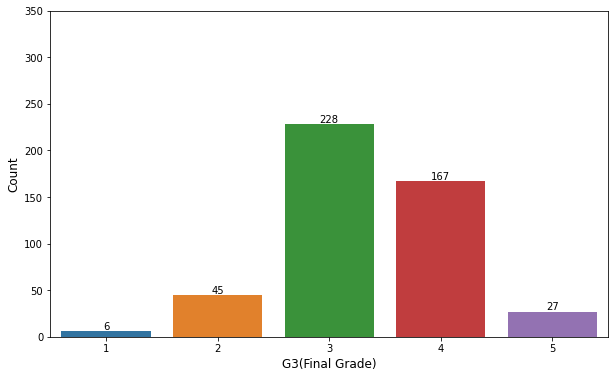

In [418]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y_train)
plt.ylim(0,350)
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 2,p.get_height(),ha = 'center')

In [0]:
model = RandomForestClassifier()

In [420]:
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracie: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.64210526 0.58947368 0.6        0.58510638 0.5106383 ]
Mean Accuracie: 0.59
Standard Deviation: 0.04


In [0]:
# parameters = {'n_estimators':[100,500,1000],'max_depth':[5,15,30],'min_samples_split':[2,10,100],'min_samples_leaf':[1,5,10]}
parameters = {'n_estimators':[1000],'max_depth':[30],'min_samples_split':[2],'min_samples_leaf':[1]}

grid_search = GridSearchCV(estimator = model,param_grid = parameters,scoring = 'accuracy',cv = 5)
grid_search = grid_search.fit(X_train,y_train)

In [422]:
grid_search.best_score_
grid_search.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [423]:
model = RandomForestClassifier(n_estimators = 1000,max_depth = 30,min_samples_split = 2,min_samples_leaf = 1)
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracie: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.64210526 0.56842105 0.61052632 0.56382979 0.5       ]
Mean Accuracie: 0.58
Standard Deviation: 0.05


In [0]:
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [425]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         8
           3       0.55      0.67      0.61        64
           4       0.40      0.48      0.44        44
           5       0.00      0.00      0.00        13

    accuracy                           0.49       130
   macro avg       0.19      0.23      0.21       130
weighted avg       0.41      0.49      0.45       130



In [426]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,4,5
1,4,3
2,4,5
3,3,3
4,3,3


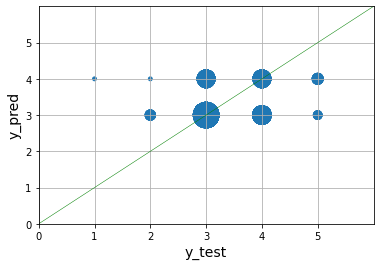

In [427]:
c = Counter(zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist()))
s = [15 * c[(x,y)] for x,y in zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist())]

plt.scatter(df_temp['y_test'],df_temp['y_pred'],s = s)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [428]:
rmse(y_pred,y_test)

0.8412444993533733

In [429]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5692307692307692
Mean Squared Error: 0.7076923076923077
Root Mean Squared Error: 0.8412444993533733


## XGBoost

In [0]:
model = XGBClassifier()

In [311]:
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracie: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.67755102 0.83673469 0.8        0.83265306 0.75510204]
Mean Accuracie: 0.78
Standard Deviation: 0.06


In [0]:
# parameters = {'learning_rate':[0.01,0.1,0.5,1],'gamma':[0.5,0.1,0.001],'max_depth':[2,10,20]}
parameters = {'learning_rate':[0.1],'gamma':[0.1],'max_depth':[10]}

grid_search = GridSearchCV(estimator = model,param_grid = parameters,scoring = 'accuracy',cv = 5)
grid_search = grid_search.fit(X_train,y_train)

In [313]:
grid_search.best_score_
grid_search.best_params_

{'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 10}

In [314]:
model = XGBClassifier(learning_rate = 0.1,gamma = 0.1,max_depth = 10)
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracie: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.69387755 0.83673469 0.84897959 0.85306122 0.84897959]
Mean Accuracie: 0.82
Standard Deviation: 0.06


In [0]:
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [316]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.25      0.38      0.30         8
           3       0.58      0.59      0.59        64
           4       0.51      0.50      0.51        44
           5       0.30      0.23      0.26        13

    accuracy                           0.51       130
   macro avg       0.33      0.34      0.33       130
weighted avg       0.51      0.51      0.51       130



In [317]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,4,5
1,4,3
2,4,5
3,5,3
4,3,3


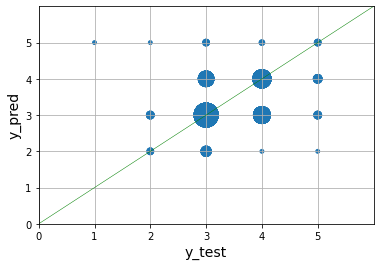

In [318]:
c = Counter(zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist()))
s = [15 * c[(x,y)] for x,y in zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist())]

plt.scatter(df_temp['y_test'],df_temp['y_pred'],s = s)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [319]:
rmse(y_pred,y_test)

0.9567573440452993

## Stacking

In [0]:
X_base,X_meta,y_base,y_meta = train_test_split(X_train,y_train,test_size = 0.5,random_state = 42)

### Base Models 

In [0]:
model = SVC(C = 10,kernel = 'rbf',gamma = 0.1)
model.fit(X_base,y_base)

y_pred_svm_meta = model.predict(X_meta)
y_pred_svm_test = model.predict(X_test)

In [0]:
model = KNeighborsClassifier(n_neighbors = 2,p = 1)
model.fit(X_base,y_base)

y_pred_knn_meta = model.predict(X_meta)
y_pred_knn_test = model.predict(X_test)

In [0]:
model = DecisionTreeClassifier(max_depth = 30,min_samples_split = 2,min_samples_leaf = 1)
model.fit(X_base,y_base)

y_pred_dt_meta = model.predict(X_meta)
y_pred_dt_test = model.predict(X_test)

In [0]:
model = RandomForestClassifier(n_estimators = 1000,max_depth = 30,min_samples_split = 2,min_samples_leaf = 1)
model.fit(X_base,y_base)

y_pred_rf_meta = model.predict(X_meta)
y_pred_rf_test = model.predict(X_test)

In [0]:
model = XGBClassifier(learning_rate = 0.1,gamma = 0.1,max_depth = 10)
model.fit(X_base,y_base)

y_pred_xgb_meta = model.predict(X_meta)
y_pred_xgb_test = model.predict(X_test)

In [326]:
y_pred_svm_meta = pd.DataFrame(y_pred_svm_meta)
y_pred_knn_meta = pd.DataFrame(y_pred_knn_meta)
y_pred_dt_meta = pd.DataFrame(y_pred_dt_meta)
y_pred_rf_meta = pd.DataFrame(y_pred_rf_meta)
y_pred_xgb_meta = pd.DataFrame(y_pred_xgb_meta)

df_X_meta = pd.concat([y_pred_svm_meta,y_pred_knn_meta,y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta],axis = 1)
df_X_meta.columns = ['y_pred_svm_meta','y_pred_knn_meta','y_pred_dt_meta','y_pred_rf_meta','y_pred_xgb_meta']

df_X_meta.head()

,y_pred_svm_meta,y_pred_knn_meta,y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta
0,1,1,1,1,1
1,1,1,1,1,1
2,2,2,2,2,2
3,5,4,5,5,5
4,4,4,4,4,4


In [327]:
y_pred_svm_test = pd.DataFrame(y_pred_svm_test)
y_pred_knn_test = pd.DataFrame(y_pred_knn_test)
y_pred_dt_test = pd.DataFrame(y_pred_dt_test)
y_pred_rf_test = pd.DataFrame(y_pred_rf_test)
y_pred_xgb_test = pd.DataFrame(y_pred_xgb_test)

df_X_test = pd.concat([y_pred_svm_test,y_pred_knn_test,y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test],axis = 1)
df_X_test.columns = ['y_pred_svm_test','y_pred_knn_test','y_pred_dt_test','y_pred_rf_test','y_pred_xgb_test']

df_X_test.head()

,y_pred_svm_test,y_pred_knn_test,y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test
0,4,3,3,4,4
1,4,3,4,3,4
2,4,3,5,4,4
3,3,5,4,5,2
4,3,4,1,3,3


### Meta Model 

In [0]:
model = LogisticRegression()
model.fit(df_X_meta,y_meta)

y_pred_test = model.predict(df_X_test)

In [329]:
y_pred_test = pd.DataFrame(y_pred_test)

df_temp = pd.concat([y_pred_test,y_test],axis = 1)
df_temp.columns = ['y_pred_test','y_test']

df_temp.head()

,y_pred_test,y_test
0,4,5
1,4,3
2,4,5
3,3,3
4,3,3


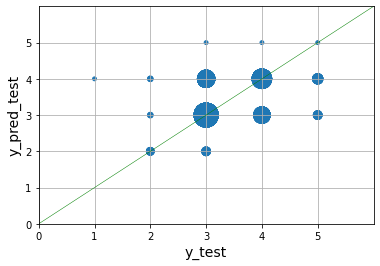

In [330]:
c = Counter(zip(df_temp['y_pred_test'].tolist(),df_temp['y_test'].tolist()))
s = [15 * c[(x,y)] for x,y in zip(df_temp['y_pred_test'].tolist(),df_temp['y_test'].tolist())]

plt.scatter(df_temp['y_test'],df_temp['y_pred_test'],s = s)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred_test',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [331]:
rmse(y_pred,y_test)

0.9567573440452993